In [1]:
import numpy as np 
import pandas as pd
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.shape

(200, 6)

In [4]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [11]:
import seaborn as sns
from sklearn import preprocessing 
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

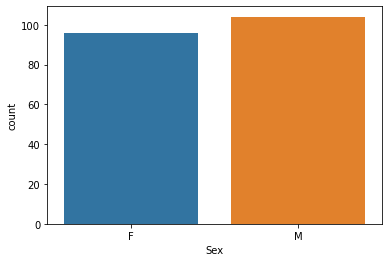

In [14]:
sns.countplot(x = 'Sex', data = df)
plt.show()

<AxesSubplot:xlabel='BP', ylabel='count'>

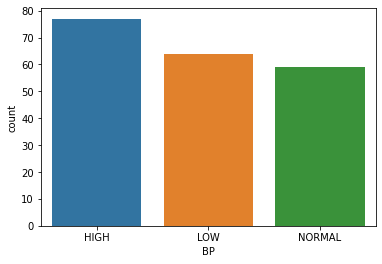

In [15]:
sns.countplot(x = 'BP',data = df)

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

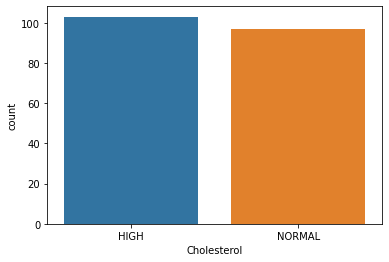

In [16]:
sns.countplot(x = 'Cholesterol',data=df)

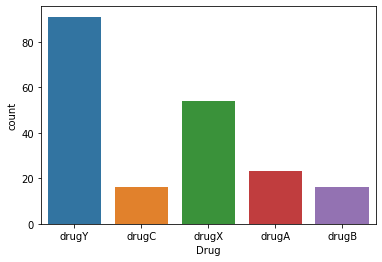

In [17]:
sns.countplot(x = 'Drug',data=df)
plt.show()

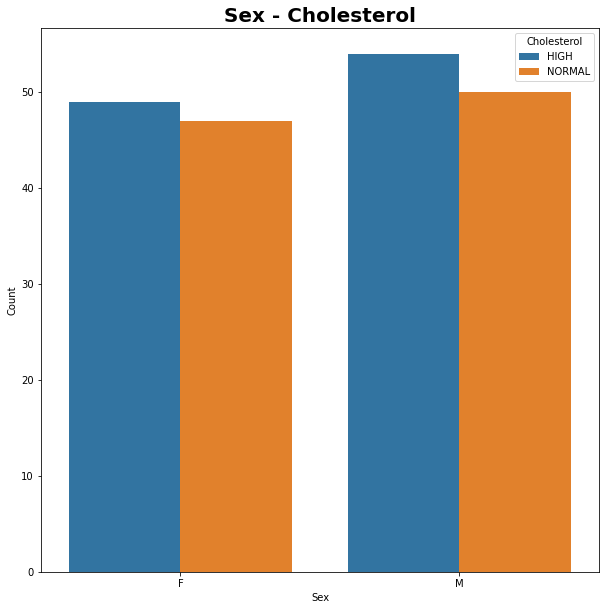

In [23]:
df_Sex_Cholesterol = df.groupby(["Sex", "Cholesterol"]).size().reset_index(name = "Count")

plt.figure(figsize = (10,10))
sns.barplot(x = "Sex", y = "Count", hue = "Cholesterol", data = df_Sex_Cholesterol)
plt.title("Sex - Cholesterol", fontsize=20, fontweight='bold')
plt.show()

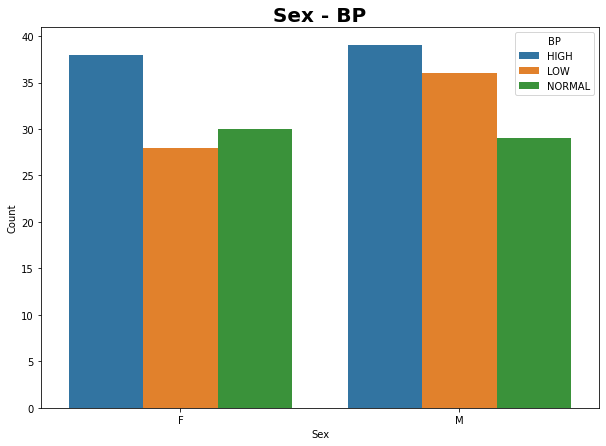

In [24]:
df_Sex_BP = df.groupby(["Sex", "BP"]).size().reset_index(name = "Count")

plt.figure(figsize = (10,7))
sns.barplot(x = "Sex", y = "Count", hue = "BP", data = df_Sex_BP)
plt.title("Sex - BP", fontsize=20, fontweight='bold')
plt.show()

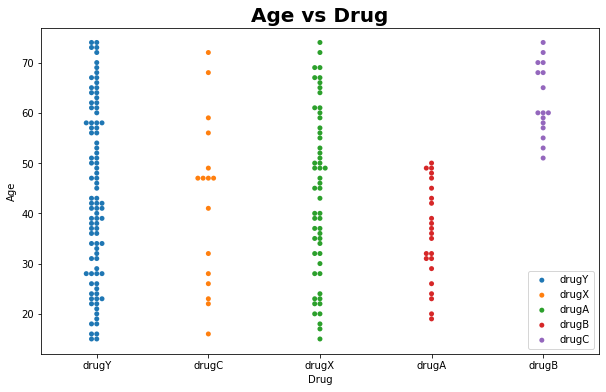

In [25]:
plt.figure(figsize = (10,6))
sns.swarmplot(x = "Drug", y = "Age", data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age vs Drug", fontsize=20, fontweight='bold')
plt.show()

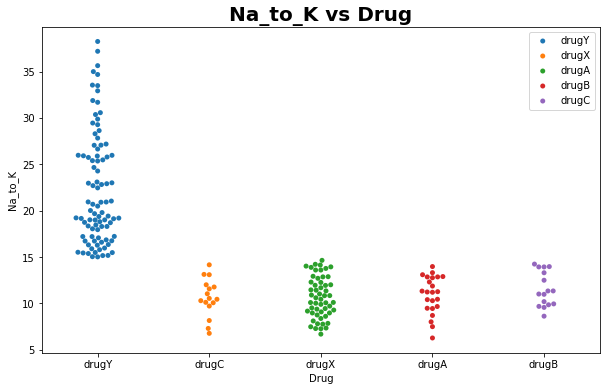

In [26]:
plt.figure(figsize = (10,6))
sns.swarmplot(x = "Drug", y = "Na_to_K", data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Na_to_K vs Drug", fontsize=20, fontweight='bold')
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [32]:
def label_encoder(x):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])

lables = ['Sex', 'BP', 'Cholesterol', 'Drug']
for i in lables:
    label_encoder(i)

In [33]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 5) (40, 5) (160,) (40,)


In [35]:
classf1 = RandomForestClassifier(random_state=42)
accuracies = cross_val_score(classf1, X_train, y_train, cv=5)
classf1.fit(X_train, y_train)

print("Train Score:", np.mean(accuracies))
print("Test Score:", classf1.score(X_test, y_test))

Train Score: 0.9875
Test Score: 1.0


In [36]:
y_pred1 = classf1.predict(X_test)
y_pred1      #predicting the values

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0], dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report 

In [40]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

